#Connect Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [2]:
%cd /mydrive/Test\ Technique__Imen\ TRABELSI

/content/gdrive/My Drive/Test Technique__Imen TRABELSI


#Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
import plotly.graph_objs as go

In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt

#Import data 

In [9]:
data = pd.read_excel('./datasets/Data - Test technique PFE 8.xlsx')

In [10]:
position=pd.read_csv('./datasets/mer positions.csv')

In [11]:
position.columns

Index(['longitude', 'latitude', 'll'], dtype='object')

In [12]:
data.columns

Index(['id_mutation', 'date_mutation', 'surface_reelle_bati',
       'nombre_pieces_principales', 'longitude', 'latitude', 'distance_mer',
       'prix'],
      dtype='object')

In [13]:
position.describe()

,longitude,latitude,ll
count,793.000000,793.000000,793.0
mean,6.066364,43.110443,0.0
std,0.300359,0.086172,0.0
min,5.670597,43.026063,0.0
25%,5.825155,43.066586,0.0
50%,5.941316,43.083979,0.0
75%,6.161761,43.115330,0.0
max,6.929988,43.475887,0.0


In [14]:
data.describe()

,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer,prix
count,999.0,999.000000,999.000000,999.000000,999.000000,0.0,9.990000e+02
mean,2014.0,90.451451,3.810811,6.594757,43.413464,NaN,4.023374e+05
std,0.0,36.268557,1.193353,0.182657,0.108505,NaN,4.355703e+05
min,2014.0,14.000000,0.000000,5.747522,43.157829,NaN,5.000000e+03
25%,2014.0,69.000000,3.000000,6.518627,43.319428,NaN,2.155000e+05
50%,2014.0,88.000000,4.000000,6.617796,43.436563,NaN,2.950000e+05
75%,2014.0,107.000000,4.000000,6.732366,43.495205,NaN,4.250000e+05
max,2014.0,300.000000,9.000000,6.926844,43.774502,NaN,5.880000e+06


In [15]:
dist=[]
div_dist=[]

for i in range(len(data)):
  for j in range(len(position)):
    dist.append(((data.longitude[i] - position.longitude[j])**2 + (data.latitude[i] - position.latitude[j])**2)**0.5)

In [16]:
data.distance_mer[0] = min(dist[0:793])

In [17]:
for i in range(1,len(data)-1):
  k=range(0,791415,793)
  data.distance_mer[i]=min(dist[k[i]:k[i+1]])

In [18]:
for j in range(len(position)):

  div_dist.append(((data.longitude[998] - position.longitude[j])**2 + (data.latitude[998] - position.latitude[j])**2)**0.5)

data.distance_mer[998]=min(div_dist)    

In [19]:
data.tail()

,id_mutation,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer,prix
994,2014-877801,2014,88,4,6.033051,43.341624,0.239383,493917.7
995,2014-877805,2014,32,1,5.876707,43.602998,0.466456,185000.0
996,2014-877806,2014,79,4,6.691434,43.619773,0.209958,225000.0
997,2014-877809,2014,50,2,6.693541,43.624888,0.214363,140000.0
998,2014-877816,2014,108,4,6.045601,43.327445,0.227088,120000.0


In [20]:
data.isna().sum()

id_mutation                  0
date_mutation                0
surface_reelle_bati          0
nombre_pieces_principales    0
longitude                    0
latitude                     0
distance_mer                 0
prix                         0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                999 non-null    object 
 1   date_mutation              999 non-null    int64  
 2   surface_reelle_bati        999 non-null    int64  
 3   nombre_pieces_principales  999 non-null    int64  
 4   longitude                  999 non-null    float64
 5   latitude                   999 non-null    float64
 6   distance_mer               999 non-null    float64
 7   prix                       999 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [22]:
data.describe()

,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer,prix
count,999.0,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,2014.0,90.451451,3.810811,6.594757,43.413464,0.111575,4.023374e+05
std,0.0,36.268557,1.193353,0.182657,0.108505,0.119062,4.355703e+05
min,2014.0,14.000000,0.000000,5.747522,43.157829,0.002063,5.000000e+03
25%,2014.0,69.000000,3.000000,6.518627,43.319428,0.018332,2.155000e+05
50%,2014.0,88.000000,4.000000,6.617796,43.436563,0.062629,2.950000e+05
75%,2014.0,107.000000,4.000000,6.732366,43.495205,0.188892,4.250000e+05
max,2014.0,300.000000,9.000000,6.926844,43.774502,0.621383,5.880000e+06


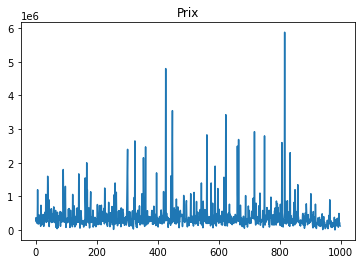

In [23]:
data["prix"].plot.line(title='Prix')

#Feature selection

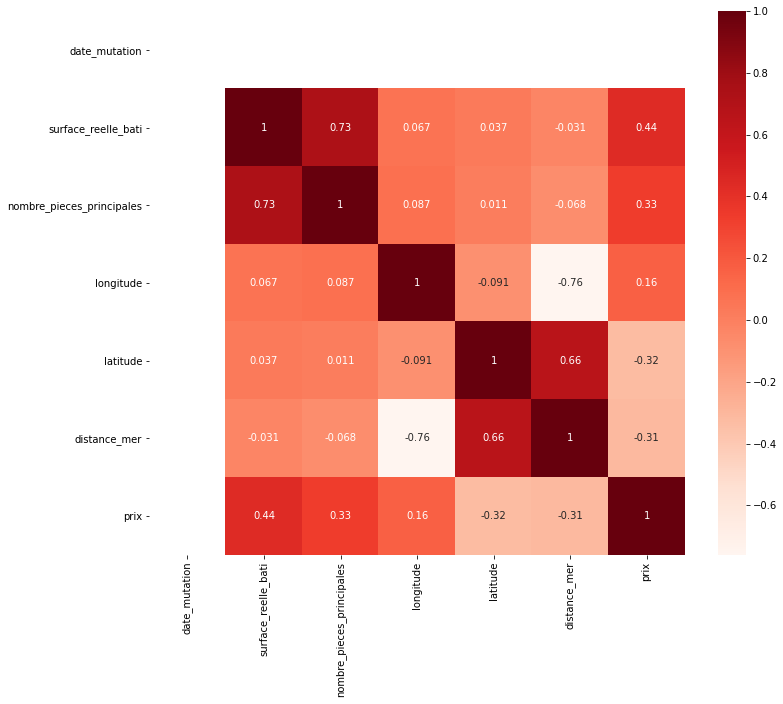

In [24]:
###1. Filter Method:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
#Corrélation avec la variable de sortie 
cor_target = abs (cor ["prix"]) 
#Sélection des entités hautement corrélées 
pertinence_features = cor_target [cor_target> 0.3] 
pertinence_features

surface_reelle_bati          0.438409
nombre_pieces_principales    0.334194
latitude                     0.323858
distance_mer                 0.312837
prix                         1.000000
Name: prix, dtype: float64

In [26]:
data = data.drop('id_mutation',axis=1)

In [27]:
X=data.drop('prix',1)
y=data['prix']

In [28]:
X.head()

,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer
0,2014,153,4,6.484708,43.506405,0.247504
1,2014,90,4,6.745540,43.461693,0.044073
2,2014,46,3,6.836668,43.525037,0.095206
3,2014,117,5,6.802083,43.433279,0.019395
4,2014,98,4,6.483364,43.509586,0.250950


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score #
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selectload_irision with Cross Validation

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

**XGBOOST**

In [32]:
xgb1 = XGBRegressor()
parameters = { 'learning_rate': [0.01,0.02,0.03], 
               'max_depth': [4,5,6],
               'min_child_weight': [1,2,3],
               'silent': [1],
               'subsample': [0.3,0.4,0.5],
               'colsample_bytree': [0.5,0.7,0.8],
               'n_estimators': [400,450,550]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   39.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  4.0min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  5.9min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  8.2min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 10.8min
[Parallel(n_jobs=5)]: Done 3645 out of 3645 | elapsed: 12.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.8],
                         'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 5, 6], 'min_child_weight': [1, 2, 3],
                 

In [33]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(xgb_grid.best_score_)))

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 400, 'silent': 1, 'subsample': 0.4}
Lowest RMSE found:  287620.59295043844


In [34]:
pred_xgboost=xgb_grid.predict(X_test)

In [35]:
mse_xgboost= mean_squared_error(y_test,pred_xgboost)
rmse_xgboost=np.sqrt(np.abs(xgb_grid.best_score_))
mae_xgboost =mean_absolute_error(pred_xgboost, y_test)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_xgboost=mean_absolute_percentage_error(y_test,pred_xgboost)
print('\nMean Square error" ',mse_xgboost)
print("Lowest RMSE found: ", rmse_xgboost)
print("Mean Absolute Error : " + str(mae_xgboost))
print("Mean Absolute percentage Error : " + str(mape_xgboost))


Mean Square error"  55538343637.34793
Lowest RMSE found:  287620.59295043844
Mean Absolute Error : 127822.336075
Mean Absolute percentage Error : 37.9297559696627


**Random Forest**

In [36]:
reg=RandomForestRegressor()
parameters={
    'max_depth' :[10,20,40,50,70,80,90],
    'n_estimators':[100,200,400,700,900]
    
}
gridforest=GridSearchCV(reg,parameters,cv=5,n_jobs=-1,verbose=1)
gridforest.fit(X_train,y_train)
gridforest.best_params_

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  3.4min finished


{'max_depth': 70, 'n_estimators': 100}

In [37]:
pred_rf=gridforest.predict(X_test)

In [38]:
mse_rf= mean_squared_error(y_test,pred_rf)
rmse_rf = sqrt(mean_squared_error(y_true=y_test,y_pred=pred_rf))
mae_rf =mean_absolute_error(pred_rf, y_test)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_rf=mean_absolute_percentage_error(y_test,pred_rf)
print('\nMean Square error" ',mse_rf)
print("Root Mean Square error: ", rmse_rf)
print("Mean Absolute Error : " + str(mae_rf))
print("Mean Absolute percentage Error : " + str(mape_rf))


Mean Square error"  32148628255.04041
Root Mean Square error:  179300.38554069094
Mean Absolute Error : 112412.49090464681
Mean Absolute percentage Error : 34.97122260442373


**SVR**

In [39]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5,3,7 ,10,12,15,17],'gamma': [1e-15,1e-10,1e-7, 1e-4],'epsilon':[0.01,0.05,0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'C': 17, 'epsilon': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}

In [40]:
pred_svr=clf.predict(X_test)

In [41]:
mse_svr= mean_squared_error(y_test,pred_svr)
rmse_svr = sqrt(mean_squared_error(y_true=y_test,y_pred=pred_svr))
mae_svr =mean_absolute_error(pred_svr, y_test)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_svr=mean_absolute_percentage_error(y_test,pred_svr)
print('\nMean Square error" ',mse_svr)
print("Root Mean Square error: ", rmse_svr)
print("Mean Absolute Error : " + str(mae_svr))
print("Mean Absolute percentage Error : " + str(mape_svr))


Mean Square error"  116216851746.94324
Root Mean Square error:  340905.9280020564
Mean Absolute Error : 162884.89619655738
Mean Absolute percentage Error : 39.9089227859207


 **K-Neighbors Regressor**

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
knn = KNeighborsRegressor()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10)
# fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

In [45]:
pred_knn=grid.predict(X_test)

In [46]:
mse_knn= mean_squared_error(y_test,pred_knn)
rmse_knn = sqrt(mean_squared_error(y_true=y_test,y_pred=pred_knn))
mae_knn=mean_absolute_error(pred_knn, y_test)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_knn=mean_absolute_percentage_error(y_test,pred_knn)
print('\nMean Square error" ',mse_knn)
print("Root Mean Square error: ", rmse_knn)
print("Mean Absolute Error : " + str(mae_knn))
print("Mean Absolute percentage Error : " + str(mape_knn))


Mean Square error"  112090706657.57693
Root Mean Square error:  334799.50217641745
Mean Absolute Error : 186202.39457105263
Mean Absolute percentage Error : 56.595887185915316


**Compare Models**

In [47]:
model=["Xgboost","RandomForest","SVR","Knn"]
mse=[mse_xgboost,mse_rf,mse_svr,mse_knn]
rmse=[rmse_xgboost,rmse_rf,rmse_svr,rmse_knn]
mae=[mae_xgboost,mae_rf,mae_svr,mae_knn]
mape=[mape_xgboost,mape_rf,mape_svr,mape_knn]

In [48]:
Data={"model":model,"mse":mse,"rmse":rmse,"mae":mae,"mape":mape}

In [49]:
compare=pd.DataFrame(Data)
compare.head()

,model,mse,rmse,mae,mape
0,Xgboost,5.553834e+10,287620.592950,127822.336075,37.929756
1,RandomForest,3.214863e+10,179300.385541,112412.490905,34.971223
2,SVR,1.162169e+11,340905.928002,162884.896197,39.908923
3,Knn,1.120907e+11,334799.502176,186202.394571,56.595887


In [50]:
import pickle

In [52]:
pickle.dump(gridforest, open('./model/model.pkl','wb'))